In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd

## load the input data

In [2]:
sales_df = pd.read_csv('data/example_retail_sales.csv')
sales_df.head(5)

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


#### log transformation of the y values

In [3]:
sales_df['y_orig']= sales_df['y']
sales_df['y'] = np.log(sales_df['y'])
sales_df.head(5)

,ds,y,y_orig
0,1992-01-01,11.893934,146376
1,1992-02-01,11.898725,147079
2,1992-03-01,11.978770,159336
3,1992-04-01,12.005601,163669
4,1992-05-01,12.043954,170068


## start modelling

### instantiate Prophet

In [4]:
model = Prophet()
model.fit(sales_df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### we can ignore the above warning because we are running on monthly data. 

In [5]:
future_data = model.make_future_dataframe(periods=6, freq = 'm')
forecast_data = model.predict(future_data)

In [6]:
forecast_data[['ds','yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057164,13.037681,13.077311
295,2016-07-31,13.081269,13.061661,13.103097
296,2016-08-31,13.014327,12.994393,13.035530
297,2016-09-30,13.036747,13.015206,13.059351
298,2016-10-31,13.054205,13.031655,13.076188


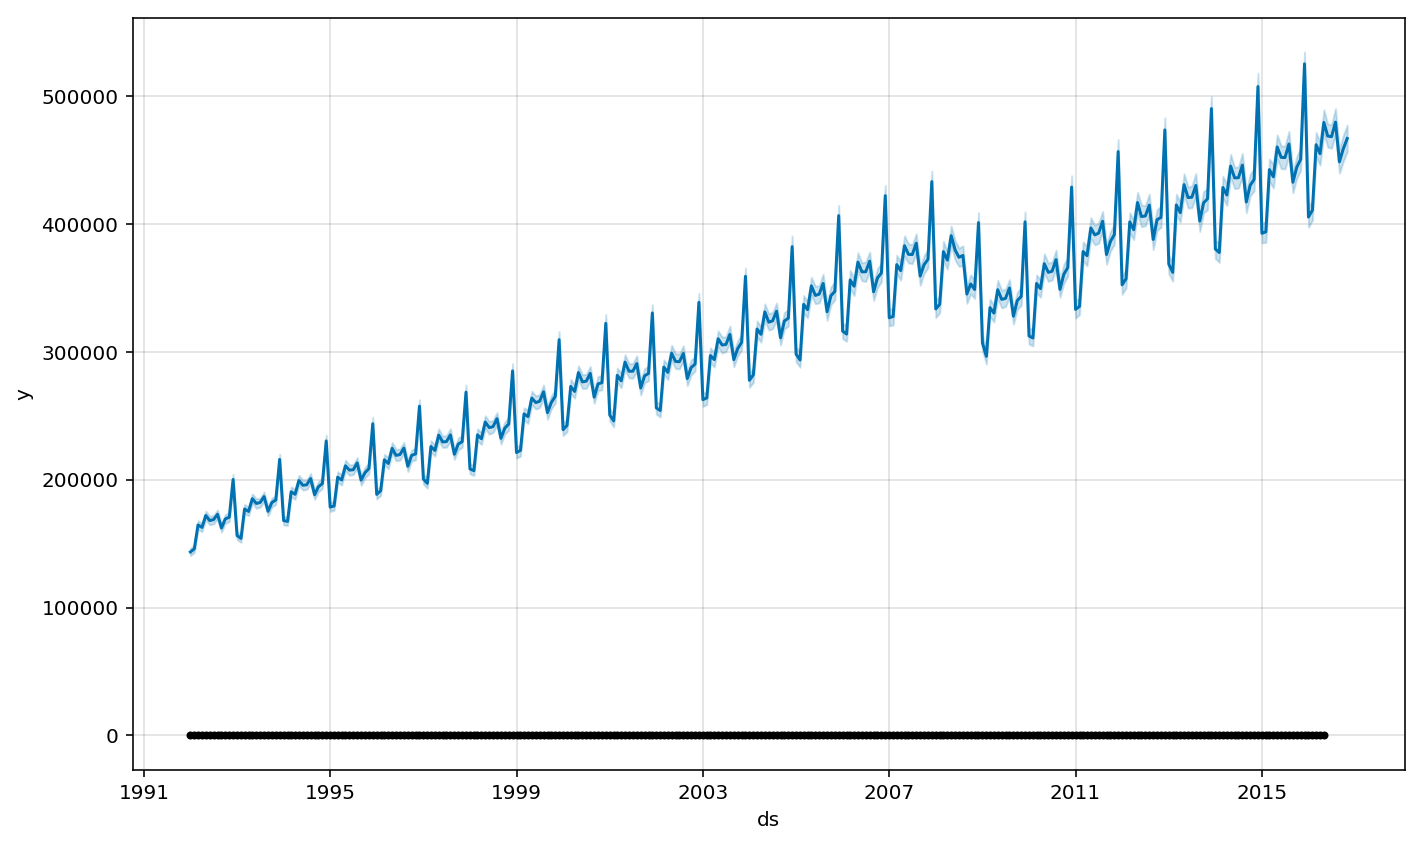

In [23]:
# %config InlineBackend.figure_format = 'retina'
model.plot(forecast_data)

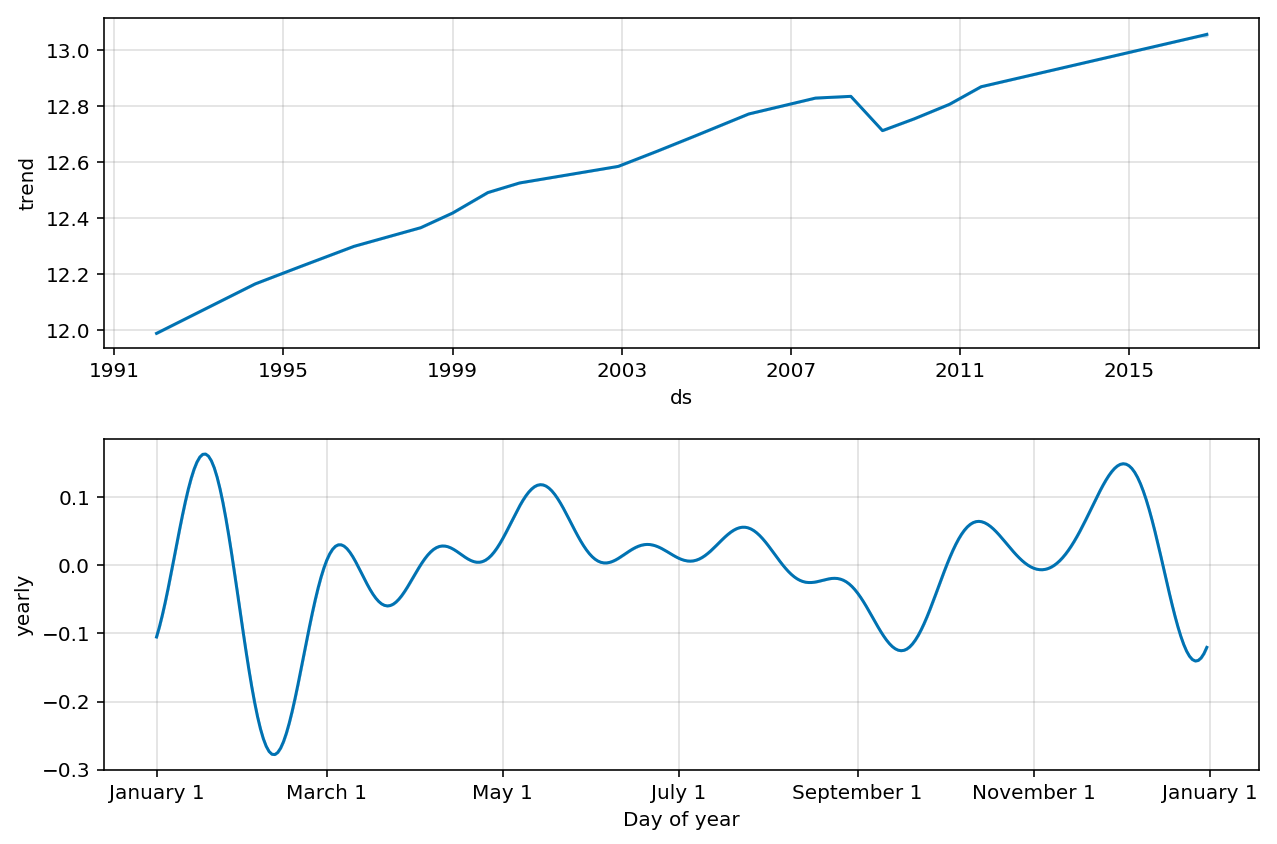

In [24]:
%config InlineBackend.figure_format = 'retina'
model.plot_components(forecast_data)

#### saving the original data

In [9]:
forecast_data_orig = forecast_data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])


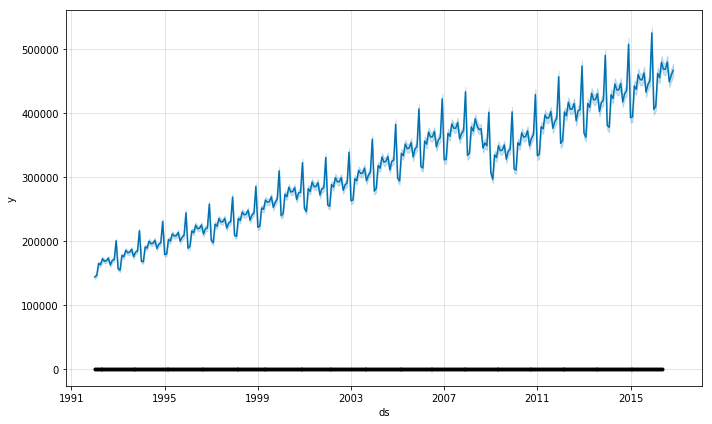

In [10]:
model.plot(forecast_data_orig)

In [11]:
sales_df['y_log'] = sales_df['y']
sales_df['y'] = sales_df['y_orig']

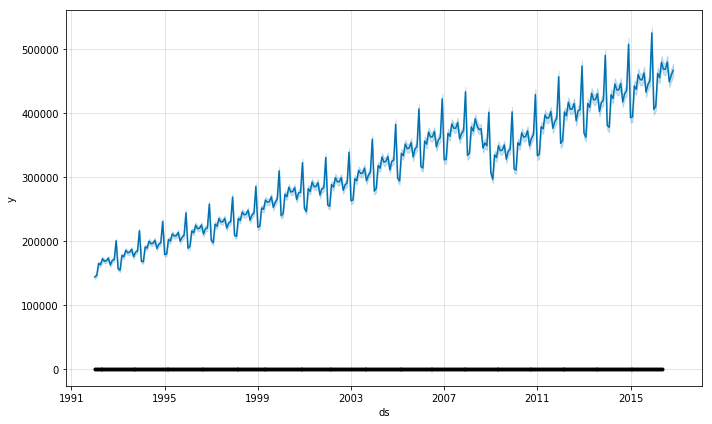

In [14]:
model.plot(forecast_data)

In [15]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [16]:
%env A = 10

env: A=10


In [21]:
a = %env A
print a

10
